Project Task 2 - Advanced Classifiers and Evaluation

1) Using the dataset for classification prepared for Task 1 build several advanced classifiers able to predict room occupancy from the available variables. In particular, you are required to use SVM (linear and non-linear), NN (Single and Multilayer Perceptron), DNN (design at least two different architectures), Ensemble Classifier (RandomForest, AdaBoost and a Bagging technique in which you can select a base classifier of your choice with a justification).

2) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, etc; Draw your conclusion about the classifiers.

3) Highlight in the report different aspects typical of each classifier. For instance for SVM: is a linear model the best way to shape the decision boundary? Or for NN: what are the parameter sets or the convergence criteria suggesting you are avoiding overfitting? How many iterations/base classifiers are needed to allow a good estimation using an ensemble method? Which is the feature importance for the Random Forest?

4) You are NOT required to experiment also in the imbalanced case but if you do it is not considered a mistake.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
df1 = pd.read_csv("datatest.txt")

In [5]:
df2 = pd.read_csv("datatest2.txt")

In [6]:
df3 = pd.read_csv("datatraining.txt")

In [7]:
df = pd.concat([df1,df2,df3])

In [8]:
df.shape

(20560, 7)

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [10]:
df_train.reset_index(inplace=True, drop=True)

In [11]:
df_train.shape

(16448, 7)

In [12]:
df_test.shape

(4112, 7)

In [13]:
dates = pd.to_datetime(df_train['date'], infer_datetime_format=True)
df_train['day'] = dates.dt.day
df_train['hour'] = dates.dt.hour

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
weekend = []
for i in df_train.day:
    if i == 7 or i == 8:
        weekend.append(1)
    else:
        weekend.append(0)
weekend = pd.Series(weekend)
df_train['weekend'] = weekend

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
daylight = []
for i in df_train.hour:
    if i >= 7 and i <= 17:
        daylight.append(1)
    else:
        daylight.append(0)
daylight = pd.Series(daylight)
df_train['daylight'] = daylight

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
0,2015-02-07 18:45:00,20.200000,23.100000,0.0,438.000000,0.003376,0,7,18,1,0
1,2015-02-15 09:04:59,20.675000,29.745000,138.5,621.750000,0.004484,0,15,9,0,1
2,2015-02-14 08:25:00,19.823333,36.826667,0.0,506.333333,0.005274,0,14,8,0,1
3,2015-02-17 23:32:59,20.890000,30.100000,0.0,1197.000000,0.004599,0,17,23,0,0
4,2015-02-16 00:16:59,20.290000,29.290000,0.0,729.000000,0.004311,0,16,0,0,0


In [17]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 11 columns):
date             16448 non-null object
Temperature      16448 non-null float64
Humidity         16448 non-null float64
Light            16448 non-null float64
CO2              16448 non-null float64
HumidityRatio    16448 non-null float64
Occupancy        16448 non-null int64
day              16448 non-null int64
hour             16448 non-null int64
weekend          16448 non-null int64
daylight         16448 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.4+ MB


In [19]:
df_train = df_train[['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'day', 'hour', 'daylight']]

In [20]:
df_train.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,daylight
0,20.200000,23.100000,0.0,438.000000,0,7,18,0
1,20.675000,29.745000,138.5,621.750000,0,15,9,1
2,19.823333,36.826667,0.0,506.333333,0,14,8,1
3,20.890000,30.100000,0.0,1197.000000,0,17,23,0
4,20.290000,29.290000,0.0,729.000000,0,16,0,0


# Data Preparation

In [21]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [22]:
class_name = 'Occupancy'

In [23]:
res = prepare_dataset(df_train, class_name)
df_train, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df_train.head()

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


,Temperature,Humidity,Light,CO2,day,hour,daylight,Occupancy
0,20.200000,23.100000,0.0,438.000000,7,18,0,0
1,20.675000,29.745000,138.5,621.750000,15,9,1,0
2,19.823333,36.826667,0.0,506.333333,14,8,1,0
3,20.890000,30.100000,0.0,1197.000000,17,23,0,0
4,20.290000,29.290000,0.0,729.000000,16,0,0,0


# Data Partitioning

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [25]:
attributes = [col for col in df_train.columns if col != class_name]
X = df_train[attributes].values
y = df_train[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y) # IMPORTANT test_size change shape

In [26]:
X_train.shape

(13158, 7)

# PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

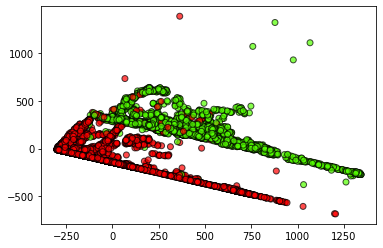

In [29]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Linear SVM

In [30]:
from sklearn.svm import LinearSVC

In [31]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9851063829787234
F1-score [0.99022151 0.96876992]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2527
           1       0.94      1.00      0.97       763

    accuracy                           0.99      3290
   macro avg       0.97      0.99      0.98      3290
weighted avg       0.99      0.99      0.99      3290



C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring = "accuracy")
for i in scores:
    print(i)
print("The mean is: ",scores.mean())

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.988145896656535
0.9914893617021276
0.9927029492246884
0.9878382487078139
The mean is:  0.9900441140727912


C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9802431610942249
F1-score [0.98698699 0.95899054]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2527
           1       0.92      1.00      0.96       763

    accuracy                           0.98      3290
   macro avg       0.96      0.99      0.97      3290
weighted avg       0.98      0.98      0.98      3290



C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring = "accuracy")
for i in scores:
    print(i)
print("The mean is: ",scores.mean())

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.988145896656535
0.9650455927051672
0.9923989054423837
0.9878382487078139
The mean is:  0.983357160877975


C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9860182370820668
F1-score [0.99082569 0.9706258 ]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2527
           1       0.95      1.00      0.97       763

    accuracy                           0.99      3290
   macro avg       0.97      0.99      0.98      3290
weighted avg       0.99      0.99      0.99      3290



C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring = "accuracy")
for i in scores:
    print(i)
print("The mean is: ",scores.mean())

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9875379939209726
0.9914893617021276
0.9914867740954697
0.9875342049255093
The mean is:  0.9895120836610197


C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [38]:
support_vectors_pca = pca.transform(support_vectors)

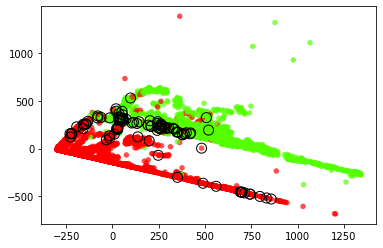

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Effect of C

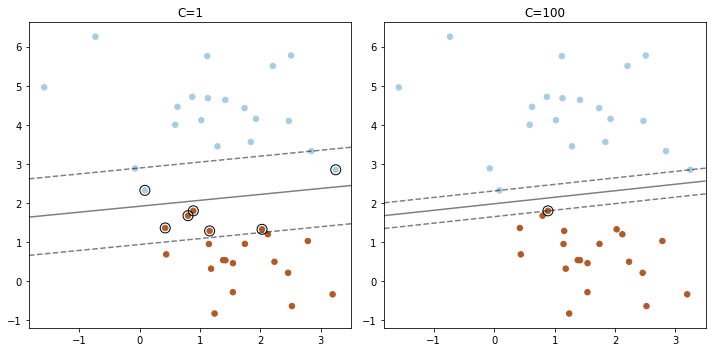

In [40]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [41]:
from sklearn.svm import SVC

In [42]:
clf = SVC(gamma='auto',C = 0.1, kernel = 'sigmoid')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7680851063829788
F1-score [0.86883273 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2527
           1       0.00      0.00      0.00       763

    accuracy                           0.77      3290
   macro avg       0.38      0.50      0.43      3290
weighted avg       0.59      0.77      0.67      3290



C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring = "accuracy")
for i in scores:
    print(i)
print("The mean is: ",scores.mean())

0.7680851063829788
0.7680851063829788
0.7683186378838552
0.7683186378838552
The mean is:  0.7682018721334171


In [44]:
clf.support_

array([ 9229,  9230,  9232, ..., 13137, 13140, 13151])

In [45]:
clf.support_vectors_[:10]

array([[2.00000000e+01, 3.64000000e+01, 7.00000000e+00, 5.00000000e+02,
        1.40000000e+01, 9.00000000e+00, 1.00000000e+00],
       [2.00000000e+01, 1.87900000e+01, 0.00000000e+00, 4.41000000e+02,
        6.00000000e+00, 2.30000000e+01, 0.00000000e+00],
       [2.05000000e+01, 3.03900000e+01, 0.00000000e+00, 7.38500000e+02,
        1.60000000e+01, 2.00000000e+01, 0.00000000e+00],
       [2.02900000e+01, 2.61750000e+01, 6.07500000e+01, 4.17750000e+02,
        8.00000000e+00, 1.50000000e+01, 1.00000000e+00],
       [2.41000000e+01, 2.25500000e+01, 2.09000000e+02, 8.10000000e+02,
        1.20000000e+01, 1.10000000e+01, 1.00000000e+00],
       [2.08400000e+01, 3.15500000e+01, 0.00000000e+00, 1.45150000e+03,
        1.70000000e+01, 2.20000000e+01, 0.00000000e+00],
       [2.14266667e+01, 2.39266667e+01, 0.00000000e+00, 6.14250000e+02,
        2.00000000e+00, 1.90000000e+01, 0.00000000e+00],
       [1.93900000e+01, 3.11500000e+01, 0.00000000e+00, 4.36500000e+02,
        8.00000000e+00, 3

In [46]:
clf.n_support_, len(X_train)

(array([3050, 3050]), 13158)

In [47]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7680851063829788
F1-score [0.86883273 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2527
           1       0.00      0.00      0.00       763

    accuracy                           0.77      3290
   macro avg       0.38      0.50      0.43      3290
weighted avg       0.59      0.77      0.67      3290



C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring = "accuracy")
for i in scores:
    print(i)
print("The mean is: ",scores.mean())

0.7680851063829788
0.7680851063829788
0.7683186378838552
0.7683186378838552
The mean is:  0.7682018721334171


In [49]:
clf.support_

array([    0,     1,     2, ..., 13137, 13140, 13151])

In [50]:
clf.support_vectors_[:10]

array([[2.07000000e+01, 2.23650000e+01, 0.00000000e+00, 4.49250000e+02,
        2.00000000e+00, 2.30000000e+01, 0.00000000e+00],
       [2.08150000e+01, 3.54250000e+01, 4.22500000e+01, 5.06500000e+02,
        1.40000000e+01, 1.10000000e+01, 1.00000000e+00],
       [2.26000000e+01, 2.73900000e+01, 0.00000000e+00, 6.72000000e+02,
        4.00000000e+00, 1.80000000e+01, 0.00000000e+00],
       [2.08900000e+01, 2.95000000e+01, 2.01500000e+02, 6.24000000e+02,
        1.50000000e+01, 9.00000000e+00, 1.00000000e+00],
       [2.25000000e+01, 2.87000000e+01, 3.30750000e+02, 6.31000000e+02,
        1.50000000e+01, 1.10000000e+01, 1.00000000e+00],
       [1.97900000e+01, 1.92900000e+01, 0.00000000e+00, 4.46500000e+02,
        7.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [2.08900000e+01, 3.32900000e+01, 0.00000000e+00, 1.56400000e+03,
        1.70000000e+01, 2.10000000e+01, 0.00000000e+00],
       [2.05000000e+01, 2.22900000e+01, 0.00000000e+00, 8.00500000e+02,
        1.20000000e+01, 7

In [51]:
clf.n_support_, len(X_train)

(array([4400, 3050]), 13158)

In [52]:
clf = SVC(gamma='auto', C=1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9629179331306991
F1-score [0.97536349 0.92506143]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2527
           1       0.87      0.99      0.93       763

    accuracy                           0.96      3290
   macro avg       0.93      0.97      0.95      3290
weighted avg       0.97      0.96      0.96      3290



In [53]:
scores = cross_val_score(clf, X_train, y_train, cv=4, scoring = "accuracy")
for i in scores:
    print(i)
print("The mean is: ",scores.mean())

0.9109422492401216
0.9088145896656535
0.9087868653086044
0.9100030404378231
The mean is:  0.9096366861630506


In [54]:
clf.support_

array([    0,     1,     2, ..., 13137, 13140, 13151])

In [55]:
clf.support_vectors_[:10]

array([[2.07000000e+01, 2.23650000e+01, 0.00000000e+00, 4.49250000e+02,
        2.00000000e+00, 2.30000000e+01, 0.00000000e+00],
       [2.08150000e+01, 3.54250000e+01, 4.22500000e+01, 5.06500000e+02,
        1.40000000e+01, 1.10000000e+01, 1.00000000e+00],
       [2.26000000e+01, 2.73900000e+01, 0.00000000e+00, 6.72000000e+02,
        4.00000000e+00, 1.80000000e+01, 0.00000000e+00],
       [2.08900000e+01, 2.95000000e+01, 2.01500000e+02, 6.24000000e+02,
        1.50000000e+01, 9.00000000e+00, 1.00000000e+00],
       [2.25000000e+01, 2.87000000e+01, 3.30750000e+02, 6.31000000e+02,
        1.50000000e+01, 1.10000000e+01, 1.00000000e+00],
       [1.97900000e+01, 1.92900000e+01, 0.00000000e+00, 4.46500000e+02,
        7.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [2.08900000e+01, 3.32900000e+01, 0.00000000e+00, 1.56400000e+03,
        1.70000000e+01, 2.10000000e+01, 0.00000000e+00],
       [2.05000000e+01, 2.22900000e+01, 0.00000000e+00, 8.00500000e+02,
        1.20000000e+01, 7

In [56]:
clf.n_support_, len(X_train)

(array([4131, 2805]), 13158)

## Effect of Different Kernels (non va.. però è una viualizzazione quindi sticazzi)

In [50]:
X = X_train
y = y_train

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.769, total=  10.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.769, total=  11.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.769, total=  11.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.769, total=  11.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.769, total=  10.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.769, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.769, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.769, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.769, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 12.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [56]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.769, total=   0.9s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.769, total=   0.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.769, total=   0.9s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.769, total=   0.9s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.769, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.769, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.769, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.769, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.769, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.988, total=   3.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.989, total=   8.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.993, total=  10.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.987, total=   8.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.987, total=   7.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.988, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.989, total=   8.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.993, total=  10.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.987, total=   8.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

In [65]:
# print best parameter after tuning 
print(grid.best_params_) 
print()
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [66]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2534
           1       0.86      0.99      0.92       756

    accuracy                           0.96      3290
   macro avg       0.93      0.97      0.95      3290
weighted avg       0.97      0.96      0.96      3290



In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': ['auto'], 
              'kernel': ['rbf','sigmoid','linear']}  
  
grid2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid2.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.1, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.768, total=   4.8s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.768, total=   4.9s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.768, total=   4.8s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.768, total=   4.8s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.768, total=   4.8s
[CV] C=0.1, gamma=auto, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=auto, kernel=sigmoid, score=0.768, total=   0.8s
[CV] C=0.1, gamma=auto, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=auto, kernel=sigmoid, score=0.768, total=   0.8s
[CV] C=0.1, gamma=auto, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=auto, kernel=sigmoid, score=0.768, total=   0.8s
[CV] C=0.1, gamma=auto, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=auto, kernel=sigmoid, score=0.768, total=   0.8s
[CV] C=0.1, gamma=auto, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 36.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': ['auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [65]:
# print best parameter after tuning 
azz = grid2.best_params_
print(grid2.best_params_) 
print()
# print how our model looks after hyper-parameter tuning 
print(grid2.best_estimator_) 


{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [60]:
grid_predictions = grid2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2527
           1       0.95      0.99      0.97       763

    accuracy                           0.99      3290
   macro avg       0.97      0.99      0.98      3290
weighted avg       0.99      0.99      0.99      3290



In [67]:
#roc curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [74]:
azzo = SVC(gamma='auto', C=0.1, kernel='linear', random_state=42,probability = True)
azzo.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [76]:
y_score = azzo.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

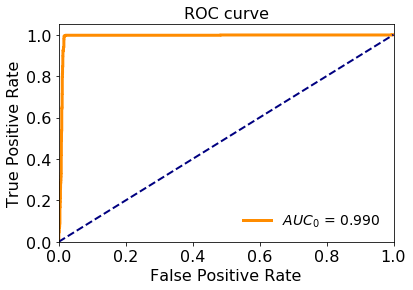

In [77]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [78]:
azzo2 = SVC(gamma='auto', C=10, kernel='rbf', random_state=42,probability = True)
azzo2.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
y_score = azzo2.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

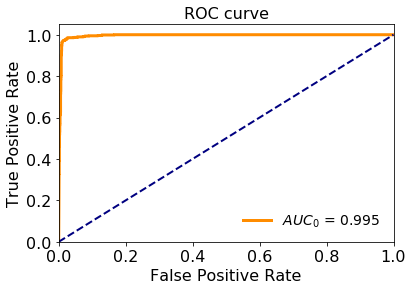

In [80]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [93]:
azzo3 = SVC(gamma='auto', C=0.1, kernel='sigmoid', random_state=42,probability = True)
azzo3.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
y_score = azzo3.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

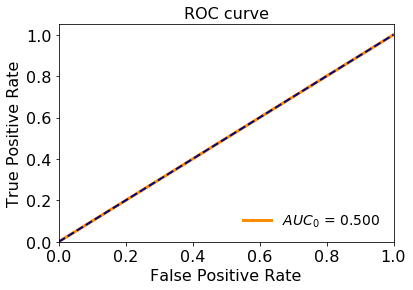

In [95]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()